In [1]:
import numpy as np
import torch

In [2]:
x = torch.rand(3,2)
x


 0.9594  0.2891
 0.5366  0.0986
 0.6576  0.0606
[torch.FloatTensor of size 3x2]

In [3]:
y = torch.ones(x.size())
y


 1  1
 1  1
 1  1
[torch.FloatTensor of size 3x2]

In [4]:
z = x+y
z


 1.9594  1.2891
 1.5366  1.0986
 1.6576  1.0606
[torch.FloatTensor of size 3x2]

In [5]:
## We can slice them like numpy 
z[:,1]


 1.2891
 1.0986
 1.0606
[torch.FloatTensor of size 3]

Tensors typically have two forms of methods, one method that returns another tensor and another method that performs the operation in place. That is, the values in memory for that tensor are changed without creating a new tensor. In place functions are always followed by an underscore, for example `z.add()` and `z.add_()`


In [6]:
z.add(1)


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

In [7]:
z


 1.9594  1.2891
 1.5366  1.0986
 1.6576  1.0606
[torch.FloatTensor of size 3x2]

In [8]:
z.add_(1)


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

In [9]:
z


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

## Reshaping
Reshaping tensors is really common operation. First to get the size and shape of tensor use `.size()`.Then, to reshape a tensor, use `.resize_()`.Notice the undersocre, reshaping is an in-place operation.

In [10]:
z.size()

torch.Size([3, 2])

In [11]:
z.resize_(2,3)


 2.9594  2.2891  2.5366
 2.0986  2.6576  2.0606
[torch.FloatTensor of size 2x3]

In [12]:
z


 2.9594  2.2891  2.5366
 2.0986  2.6576  2.0606
[torch.FloatTensor of size 2x3]

## Numpy to Torch and back
Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor form Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [14]:
a  = np.random.rand(4,3)
a

array([[0.69308973, 0.09646615, 0.97728747],
       [0.72016418, 0.5282418 , 0.97438102],
       [0.48658814, 0.61781038, 0.26487553],
       [0.84180575, 0.57768569, 0.75021959]])

In [15]:
b = torch.from_numpy(a)
b


 0.6931  0.0965  0.9773
 0.7202  0.5282  0.9744
 0.4866  0.6178  0.2649
 0.8418  0.5777  0.7502
[torch.DoubleTensor of size 4x3]

In [16]:
b.numpy()

array([[0.69308973, 0.09646615, 0.97728747],
       [0.72016418, 0.5282418 , 0.97438102],
       [0.48658814, 0.61781038, 0.26487553],
       [0.84180575, 0.57768569, 0.75021959]])

The memory is shared between the Numpy array and Torch tensor, so if we change the value in-place of one object, the other will change as well.

In [17]:
b.mul_(2)


 1.3862  0.1929  1.9546
 1.4403  1.0565  1.9488
 0.9732  1.2356  0.5298
 1.6836  1.1554  1.5004
[torch.DoubleTensor of size 4x3]

In [18]:
a

array([[1.38617947, 0.19293231, 1.95457494],
       [1.44032836, 1.0564836 , 1.94876203],
       [0.97317629, 1.23562076, 0.52975106],
       [1.68361149, 1.15537138, 1.50043918]])

## Neural networks with PyTorch

In [2]:
%matplotlib inline

#import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                               ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/',download=True, train=True,
                         transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

We have the training data loaded into `trainloader` and we make that na iterator with `iter(trainloader)`. We'd use this to loop through the dataset for training, but here I'm just grabbing the first batch sow we can check out the data.We can see below that `images` is just tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [26]:
images.size()
# 64 is batchsize
# 1 channel size so black and white image
# 28x28 is width x length

torch.Size([64, 1, 28, 28])

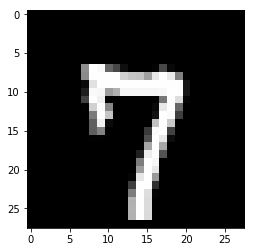

In [30]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

## Building networks with Pytorch

Here we'll use PyTroch to build a simple feedforward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the images. 

### Network summary
* inputLayer(784) -> HiddenLayer1(128) -> HiddenLayer2(64) -> OutputLayer(10) -> LossLayer(cross entropy)



To build a neural network with PyTorch, we use the `torch.nn` module. The network itself is **class inheriting** from `torch.nn.Module`. We define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to inculde a `forward` method that implements the forward pass through the network. In this method, we pass some input tensor `x` through each of the operations we defined earlier. The `torch.nn` module also has functional equivalent for things like ReLUs in `torch.nn.functional`. This module is uaually imported as `F`. THen to use ReLU activation on some layer (which is just tensor),we'd do `F.relu(x)`.
<br>$tanh(x)=\frac{2}{1 + e^{-2x}}-1$


In [5]:
from torch import nn
import torch.nn.functional as F

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__() ## calls the init method of nn.Module class
        
        ## Defining architecture of our NN
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x): ## x is a PyTorch tensor
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x,dim=1) ## x dimension (batch_size,output_layer)
        
        return x
    
model = Network()
model 
    

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Initializing weights and biases 

The weight and such are automatically initialized of us, but it's possible to customize how they are intitialized. The weights and biases are tensors attached to the layer we defined, we can get them with `model.fc1.weight` for instance.


In [37]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
1.00000e-02 *
 2.0380 -0.9702 -0.6042  ...  -3.3627  3.3756 -3.1681
 3.4554 -1.8584  2.0858  ...   1.7871  3.4589  3.0426
-2.0556  1.2204  1.7049  ...  -0.2535  3.1532 -0.8945
          ...             ⋱             ...          
-0.6080  2.8535  2.5105  ...  -1.3106 -0.2657 -1.9641
 0.6631  3.4396  1.8102  ...   0.2219 -3.0908 -2.1933
-0.3851  0.7717  1.9081  ...  -3.2981  3.4775 -1.9514
[torch.FloatTensor of size 128x784]

Parameter containing:
1.00000e-02 *
  1.5002
  2.1226
  3.4332
 -1.9844
 -2.4903
 -2.2037
 -2.3775
 -1.4231
 -1.3111
 -0.6829
 -3.5619
  0.3586
 -3.5230
 -2.9998
 -0.9786
  0.6031
  1.8653
  2.6148
  1.4130
 -2.4119
  3.5293
  0.9330
 -1.5652
 -0.6715
  1.3817
  1.7881
  0.8383
 -3.3728
 -2.0068
  1.8602
  0.3209
 -0.4366
 -1.9947
  0.5025
  2.2558
  2.5077
 -2.2163
  1.7415
  3.5629
 -2.9644
 -1.4071
  1.0051
  3.2749
 -0.6647
 -2.2725
  3.3667
  3.5495
  2.2987
 -3.3816
 -1.1975
 -1.9135
 -2.1939
 -3.1940
 -2.6132
 -0.4266
 -1.7732
  1.0596


In [39]:
model.fc1.weight.data.normal_(std=0.1)


-1.4444e-01  2.1468e-01  2.5262e-02  ...  -1.2799e-01 -4.5069e-02 -4.1398e-02
-1.5676e-01  1.1333e-01 -7.2867e-02  ...   2.6565e-01  1.3103e-01 -1.1353e-02
-1.6840e-01 -1.4185e-01  1.6091e-01  ...   6.1927e-02 -4.3640e-03  5.9997e-02
                ...                   ⋱                   ...                
 2.0832e-01  2.5102e-02 -1.2298e-01  ...  -3.4854e-02 -9.7913e-02  2.0798e-01
 9.0667e-02  7.2290e-02 -6.2925e-02  ...  -1.7155e-01 -4.7951e-02  8.6481e-02
 1.1777e-01  1.1152e-01 -1.9407e-01  ...  -8.3053e-03  1.5506e-02 -2.9949e-02
[torch.FloatTensor of size 128x784]

In [49]:
model.fc1.bias.data.normal_(std=0.1)



 0.0922
-0.0768
 0.0460
-0.0001
 0.0463
-0.0021
 0.0358
-0.0577
-0.0378
-0.0726
-0.0806
 0.1048
-0.0804
 0.0425
-0.0332
-0.0551
-0.2615
-0.1452
 0.0209
 0.0612
-0.1499
-0.0161
-0.0437
-0.0264
-0.0248
-0.0871
 0.0978
-0.0055
-0.0223
-0.1226
-0.1224
-0.0278
 0.1323
-0.0517
-0.0352
-0.0408
 0.1584
 0.1351
 0.0506
 0.1626
 0.0689
 0.0930
 0.0315
-0.0174
-0.2004
 0.0749
 0.0286
 0.0813
 0.1335
 0.0349
-0.1159
-0.0224
-0.1096
-0.0250
-0.0088
-0.1269
-0.2541
 0.1841
 0.1876
 0.0636
 0.1291
 0.1518
-0.0509
 0.0713
 0.0746
 0.1796
 0.1056
-0.1231
-0.0601
-0.1616
 0.0893
-0.0255
 0.0420
-0.1269
 0.0735
 0.0427
-0.0081
-0.0686
 0.0126
 0.0181
-0.1094
-0.0862
 0.0426
 0.1013
 0.0799
 0.0796
 0.0537
-0.1756
 0.0828
 0.0480
-0.0553
 0.1216
-0.2561
-0.0195
 0.0262
 0.0153
 0.0164
 0.0830
-0.0494
 0.0443
-0.0269
 0.0362
 0.0360
 0.1588
-0.0180
-0.0975
 0.2635
-0.0461
 0.0398
 0.0757
-0.0587
 0.1534
 0.0938
 0.0608
 0.1282
 0.1200
 0.0782
-0.0333
-0.0404
 0.0132
-0.0093
-0.0178
 0.0601
 0.1256
 0.0698

## Forward pass

Now that we have a network, let's see what happens when we pass in an image. This is called forward pass. We're going to covert the image data into a tensor, then pass it through the operation defined by the network architecture.

In [8]:
import pandas as pd

In [15]:
images, labels = next(iter(trainloader)) ## trainloader is a generator

images.resize_(64,1,784)
# print(images.size())
# images.resize_(,1,784)
ps = model.forward(images[0,:])
ps


tensor([[ 0.0845,  0.1116,  0.0993,  0.1095,  0.0841,  0.1077,  0.1070,
          0.1104,  0.1043,  0.0816]])

PyTorch provides a convient way to build networks like where a tensor is passed sequentially through operations, `nn.Sequential`.

In [24]:
input_size = 784
hidden_size = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size,hidden_size[0]),nn.ReLU(),
                     nn.Linear(hidden_size[0],hidden_size[1]),nn.ReLU(),
                      nn.Linear(hidden_size[1],output_size),nn.Softmax(dim=1))
print(model)

## Forward pass through the network and display the output
images, labels = next(iter(trainloader))
images.resize_(64,1,784)
ps = model.forward(images[0,:])
ps

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


tensor([[ 0.0816,  0.0966,  0.1195,  0.0930,  0.0960,  0.0979,  0.0959,
          0.1202,  0.1154,  0.0839]])

We can also pass in an `OrderedDict` to name the individual layers and operations. Note that a dictionary keys must be unique, so each operation must have a different name.

In [25]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('fc3',nn.Linear(hidden_size[1],output_size)),
    ('softmax',nn.Softmax(dim=1))
]))
model 

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

> **Exercise**: Build a network to classify the MNIST images with three hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.

In [30]:
input_size = 784
output_size = 10
hidden_size = [400,200,100]

model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('fc3',nn.Linear(hidden_size[1],hidden_size[2])),
    ('relu3',nn.ReLU()),
    ('fc4',nn.Linear(hidden_size[2],output_size)),
    ('softmax',nn.Softmax(dim=1))
]))
model 

images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
ps

tensor([[ 0.0979,  0.0946,  0.0980,  0.0974,  0.0942,  0.0998,  0.1046,
          0.1053,  0.1034,  0.1046]])

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


The first thing we need to do for training is define our loss function. In Pytorch, we'll usually see this as `criterion`. Here we're using softmax ouput, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, we use `loss = Criterion(output, targets)` to calculate the actual loss.

We also need to define the optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

## Autograd
Torch provide a module, `autograd`, for automatically calculating the gradient of tensors. It does this by keeping track of operations performed on tensor. To make sure PyTorch keeps track of operations on a tensor and calculate the gradients, we need to set `require_grad` on a tensor. We can do this at creation with the `require_grad` keyword, or at any time with `x.requires_grad_(True)`.


We can turn off gradients for a block of code with the `torch.no_grad()` content:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

Also, we can trun on or off gradients altogether with `torch.set_grad_enabled(True|False)`

The gradient are computed with respect to some variable `z` with `z.backward()`. This does a backward pass through the operations that created `z`. 

In [49]:
x = torch.randn(3,3, requires_grad=True)
x

tensor([[ 1.8221, -0.0212, -0.2925],
        [-0.1392,  1.3154,  0.7319],
        [-1.6575,  0.0801,  1.0192]])

In [50]:
y = x**2
y

tensor([[ 3.3201,  0.0004,  0.0855],
        [ 0.0194,  1.7302,  0.5357],
        [ 2.7473,  0.0064,  1.0387]])

In [51]:
print(y.grad_fn)

In [52]:
z = y.mean()
print(z)

tensor(1.0538)


We can check the gradient for `x` and `y` but they are empty currently.

In [53]:
print(x.grad,y.grad)

None None


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [54]:
z.backward()
print(x.grad)
print(x*(2/9))

tensor([[ 0.4049, -0.0047, -0.0650],
        [-0.0309,  0.2923,  0.1626],
        [-0.3683,  0.0178,  0.2265]])
tensor([[ 0.4049, -0.0047, -0.0650],
        [-0.0309,  0.2923,  0.1626],
        [-0.3683,  0.0178,  0.2265]])


These gradients calculations are particularly useful for neural networks. For training we need the gradients of the weights with respect to the cost. With PyTorch, we run data forward through the network to calculate the cost, then, go backwards to calculate the gradients with respect to the cost. Once we have the gradients we can make a gradient descent step. 

We'll build a network with `nn.Sequential` here. Only difference from the last part is I'm not actually using softmax on the output, but instead just using the raw output from the lost layer. This is because the output from softmax is probability distribution. Often, the ouptut will have values really closed to zero or really close to close to one. Due to inaccuracies with representation numbers as floating points, computation with a softmax output can lose accuracy and become unstable. To get around this, we'll use the raw output, called **logits**, to calcualte the loss.

In [56]:
#Hyperparameters for our network
input_size = 784
hidden_size = [128,64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('logits',nn.Linear(hidden_size[1],output_size))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)

## Training the network!
The first thing we need to do for training is define our loss function. In Pytorch, we'll usually see this as `criterion`. Here we're using softmax output, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, we use `loss = criterion(output, targets)` to calculate the actual loss.

We also need to define optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

First, let's consider just one learning step before looping through all the data.
The general process with PyTorch:
* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the the optimizer to update weights

In [58]:
print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

# Clear the gradients, do this because gradients are accumulated 
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights 
output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient - ', model.fc1.weight.grad)
optimizer.step()

Initial weights -  Parameter containing:
tensor([[-2.7111e-02,  1.3836e-02,  2.5886e-02,  ..., -1.4867e-02,
         -9.8428e-03, -6.2038e-03],
        [-3.0883e-02,  1.7498e-02,  3.0558e-02,  ..., -2.0247e-02,
         -1.9177e-02, -1.9072e-02],
        [ 8.7670e-03,  3.5633e-02,  9.7913e-03,  ..., -1.8948e-02,
         -2.0131e-03,  8.2791e-03],
        ...,
        [ 4.2191e-04, -3.3190e-02,  6.7878e-03,  ...,  3.1593e-02,
          6.6738e-03,  2.1985e-02],
        [ 3.7708e-03,  1.5728e-02, -8.7492e-05,  ...,  3.3355e-02,
          7.0147e-03, -2.1429e-02],
        [-7.7849e-03, -3.3800e-02, -2.5990e-02,  ...,  1.4680e-02,
         -2.1666e-02, -3.1533e-02]])
Gradient -  tensor(1.00000e-02 *
       [[-0.0120, -0.0120, -0.0120,  ..., -0.0120, -0.0120, -0.0120],
        [ 0.0084,  0.0084,  0.0084,  ...,  0.0084,  0.0084,  0.0084],
        [ 0.0970,  0.0970,  0.0970,  ...,  0.0970,  0.0970,  0.0970],
        ...,
        [-0.0852, -0.0852, -0.0852,  ..., -0.0852, -0.0852, -0.0852],
 

In [59]:
print('Updated weights - ', model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[-2.7109e-02,  1.3837e-02,  2.5887e-02,  ..., -1.4866e-02,
         -9.8416e-03, -6.2026e-03],
        [-3.0884e-02,  1.7497e-02,  3.0557e-02,  ..., -2.0248e-02,
         -1.9178e-02, -1.9073e-02],
        [ 8.7573e-03,  3.5623e-02,  9.7816e-03,  ..., -1.8958e-02,
         -2.0228e-03,  8.2694e-03],
        ...,
        [ 4.3043e-04, -3.3182e-02,  6.7964e-03,  ...,  3.1601e-02,
          6.6823e-03,  2.1993e-02],
        [ 3.7675e-03,  1.5725e-02, -9.0786e-05,  ...,  3.3352e-02,
          7.0114e-03, -2.1432e-02],
        [-7.7643e-03, -3.3780e-02, -2.5969e-02,  ...,  1.4701e-02,
         -2.1645e-02, -3.1512e-02]])


### Training for real

Now we'll put this algorithm into a loop so we can go through all the images. This is fairly straightforward. We'll loop through the mini-batches in our dataset, pass the data through the network to calculate the losses, get the gradients, then run the optimizer.

In [60]:
optimizer = optim.SGD(model.parameters(),lr=0.003)

In [62]:
epoch = 3
print_every = 40
steps = 0
for e in range(epoch):
    running_loss = 0
    for images,labels in iter(trainloader):
        steps+=1
        ## Flatten the MNIST images into a 784 long vector
        images.resize_(images.size()[0],784)
        
        optimizer.zero_grad()
        
        ## Forward and backward passes
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward() ##calculating gradient
        optimizer.step() ## gradient decent 
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print('Epoch: {}/{}...'.format(e+1,epoch),
                 'Loss: {:.4f}'.format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3... Loss: 2.2717
Epoch: 1/3... Loss: 2.2491
Epoch: 1/3... Loss: 2.2272
Epoch: 1/3... Loss: 2.1962
Epoch: 1/3... Loss: 2.1744
Epoch: 1/3... Loss: 2.1394
Epoch: 1/3... Loss: 2.1013
Epoch: 1/3... Loss: 2.0586
Epoch: 1/3... Loss: 2.0268
Epoch: 1/3... Loss: 1.9713
Epoch: 1/3... Loss: 1.9392
Epoch: 1/3... Loss: 1.8778
Epoch: 1/3... Loss: 1.8074
Epoch: 1/3... Loss: 1.7575
Epoch: 1/3... Loss: 1.6892
Epoch: 1/3... Loss: 1.6108
Epoch: 1/3... Loss: 1.5460
Epoch: 1/3... Loss: 1.4690
Epoch: 1/3... Loss: 1.3896
Epoch: 1/3... Loss: 1.3345
Epoch: 1/3... Loss: 1.2560
Epoch: 1/3... Loss: 1.1769
Epoch: 1/3... Loss: 1.1698
Epoch: 2/3... Loss: 0.6008
Epoch: 2/3... Loss: 1.0611
Epoch: 2/3... Loss: 1.0194
Epoch: 2/3... Loss: 0.9602
Epoch: 2/3... Loss: 0.9266
Epoch: 2/3... Loss: 0.8932
Epoch: 2/3... Loss: 0.8745
Epoch: 2/3... Loss: 0.8479
Epoch: 2/3... Loss: 0.8158
Epoch: 2/3... Loss: 0.7938
Epoch: 2/3... Loss: 0.7799
Epoch: 2/3... Loss: 0.7713
Epoch: 2/3... Loss: 0.7248
Epoch: 2/3... Loss: 0.7046
E

with the network trained, we can check out it's predictions.

In [63]:
images, labels = next(iter(trainloader))
img = images[0].view(1,784)
## Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    
#Output the network are logits, neeed to take softmax for proabailities
ps = F.softmax(logits,dim=1)


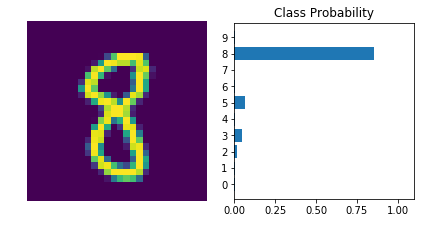

In [65]:
view_classify(img.view(1,28,28),ps)

Now our network is brilliant. It can accurately predict the digits in our images. Next up you'll write the code for training a neural network on a more complex dataset.